#### Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.

In [ ]:
#importing libraries which may required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, binom, poisson, expon, geom

In [ ]:
#Data extraction from URL
url = 'https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094'
data = pd.read_csv(url)

In [ ]:
#datatypes of columns
data.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

In [ ]:
print('Total rows count :'+str(data.shape[0]))
data.nunique()

Total rows count :550068


User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

In [ ]:
#checking unique values in Product_category, occupation and Age group
cols = ['Product_Category','Occupation','Age']
print('-'*80)
for i in cols:
  print(i+' values :',end = '')
  print(*np.sort(data[i].unique()),sep = ', ')
  print('-'*80)

--------------------------------------------------------------------------------
Product_Category values :1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20
--------------------------------------------------------------------------------
Occupation values :0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20
--------------------------------------------------------------------------------
Age values :0-17, 18-25, 26-35, 36-45, 46-50, 51-55, 55+
--------------------------------------------------------------------------------


Product Category values are between 1 to 20, similiarly Occupation values are between 0 to 20

Age is binned to 7 categories

In [ ]:
# Numerical columns of data set
data.select_dtypes('int','float').columns

Index(['User_ID', 'Occupation', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [ ]:
#Missing values
data.isna().sum(axis = 0)

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [ ]:
#outliers detection
cols = ['Age', 'Occupation','Stay_In_Current_City_Years','Product_Category', 'Purchase']

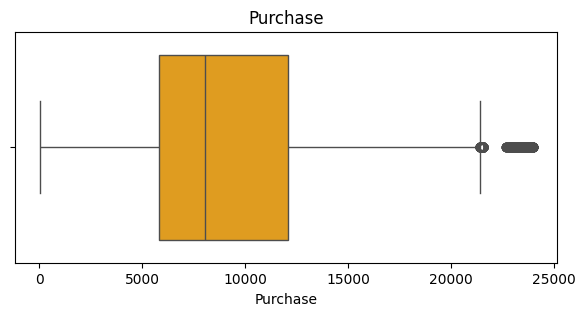

In [ ]:
#Outliers Detection
plt.figure(figsize = (7,3))
plt.title('Purchase')
sns.boxplot(data = data, x = 'Purchase',color = 'orange')
plt.show()

Purchase column has more outliers

In [ ]:
#calculating the IQR to get outliers
Q1, Q2, Q3 = np.percentile(data['Purchase'], q = [25,50,75])
IQR = Q3 - Q1

In [ ]:
purchase_outliers = data.loc[data.loc[:,'Purchase'] >= Q3+(1.5*IQR)]
purchase_outliers.shape[0]

2677

Purchase column has 2677 outliers

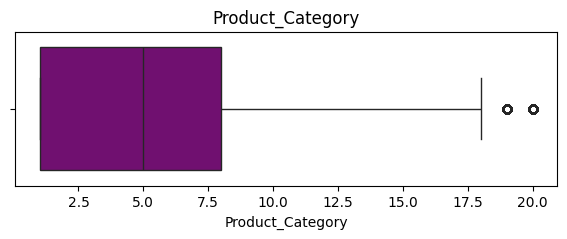

In [ ]:
plt.figure(figsize = (7,2))
plt.title('Product_Category')
sns.boxplot(data = data, x = 'Product_Category',color = 'purple')
plt.show()

In [ ]:
#calculating the IQR to get outliers
Q1, Q2, Q3 = np.percentile(data['Product_Category'], q = [25,50,75])
IQR = Q3 - Q1

In [ ]:
product_category_outliers = data.loc[data.loc[:,'Product_Category'] >= Q3+(1.5*IQR)]
product_category_outliers.shape[0]

4153

Product Category has 4153 outliers

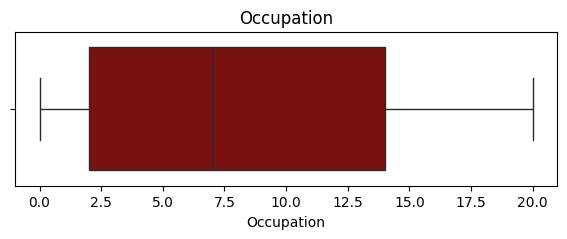

In [ ]:
plt.figure(figsize = (7,2))
plt.title('Occupation')
sns.boxplot(data = data, x = 'Occupation',color = 'darkred')
plt.show()

In [ ]:
Q1, Q2, Q3 = np.percentile(data['Occupation'], q = [25,50,75])
IQR = Q3 - Q1
product_category_outliers = data.loc[data.loc[:,'Occupation'] >= Q3+(1.5*IQR)]
product_category_outliers.shape[0]

0

Occupation has zero outliers

In [ ]:
#No. of Females and No. of Males
data.Gender.value_counts()

Gender
M    414259
F    135809
Name: count, dtype: int64

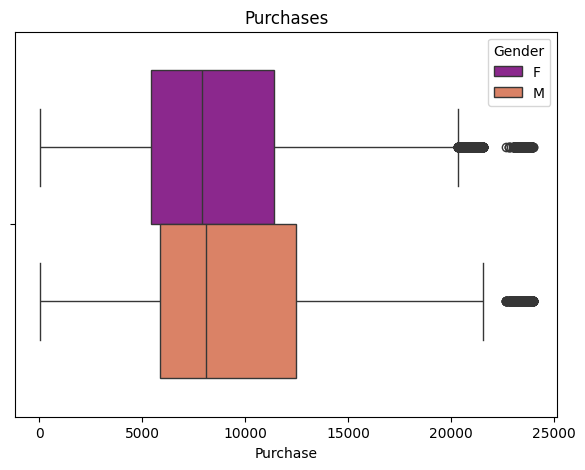

In [ ]:
plt.figure(figsize = (7,5))
plt.title('Purchases')
sns.boxplot(data = data, x = 'Purchase',hue = 'Gender',palette = 'plasma')
plt.show()

In [ ]:
#counting the Purchase outliers based on Gender
males_data = data.loc[data.Gender.isin(['M'])]
females_data = data.loc[data.Gender.isin(['F'])]

In [ ]:
#Males data
Q1, Q2, Q3 = np.percentile(males_data['Purchase'], q = [25,50,75])
IQR = Q3 - Q1
males_purchase_outliers = males_data.loc[males_data.loc[:,'Purchase'] >= Q3+(1.5*IQR)]
#Females data
Q1, Q2, Q3 = np.percentile(females_data['Purchase'], q = [25,50,75])
IQR = Q3 - Q1
females_purchase_outliers = females_data.loc[females_data.loc[:,'Purchase'] >= Q3+(1.5*IQR)]
print('Males Purchase Outliers : '+str(males_purchase_outliers.shape[0]),'Female Purchase Outliers : '+str(females_purchase_outliers.shape[0]),sep = '\n')

Males Purchase Outliers : 1812
Female Purchase Outliers : 2065


Tracking the amount spent per transaction of all the 50 million female customers, and all the 50 million male customers, calculate the average, and conclude the results.

In [ ]:
df = data.groupby(['Gender','User_ID']).aggregate({'Purchase':np.sum}).reset_index()

In [ ]:
df.head()

,Gender,User_ID,Purchase
0,F,1000001,334093
1,F,1000006,379930
2,F,1000010,2169510
3,F,1000011,557023
4,F,1000016,150490


In [ ]:
print('Average purchases of Female:'+str(df[df['Gender'] == 'F'].Purchase.mean()),
      'Average purchases of Male:'+str(df[df['Gender'] == 'M'].Purchase.mean()),sep = '\n')

Average purchases of Female:712024.3949579832
Average purchases of Male:925344.4023668639


Even Females has greater outliers still average Males spents are slightly higher than Females spents.

<Axes: xlabel='Product_Category', ylabel='Count'>

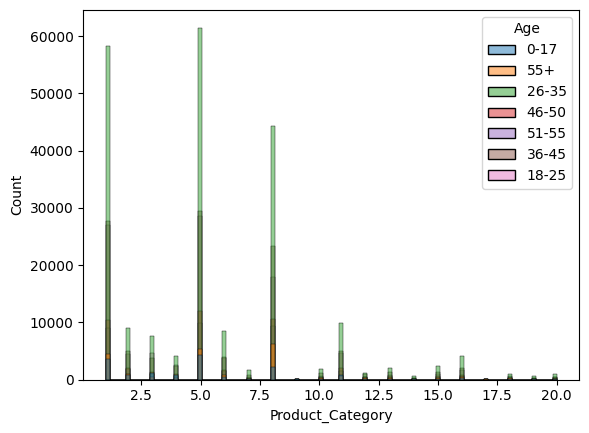

In [ ]:
#What products are different age groups buying?
sns.histplot(data = data, x = 'Product_Category', hue = 'Age')

In [ ]:
#checking for 0-17 aged people frequent purchased products
data[data['Age'] == '0-17'].value_counts(subset=['Product_ID']).head(3)

Product_ID
P00255842     65
P00145042     64
P00112142     58
Name: count, dtype: int64

Top 3 purchased Products from age group 0-17 are P00255842, P00145042, P00112142

In [ ]:
#checking for 18-25 aged people frequent purchased products
data[data['Age'] == '18-25'].value_counts(subset=['Product_ID']).head(3)

Product_ID
P00265242     389
P00112142     338
P00110742     329
Name: count, dtype: int64

Top 3 purchased Products from age group 18-25 are P00265242, P00112142, P00110742

In [ ]:
#checking for 26-55 aged people frequent purchased products
data[data['Age'] == '26-35'].value_counts(subset=['Product_ID']).head(3)

Product_ID
P00265242     746
P00110742     634
P00025442     608
Name: count, dtype: int64

Top 3 purchased Products from age group 26-35 are P00265242,P00110742, P00025442

In [ ]:
#checking for 26-55 aged people frequent purchased products
data[data['Age'] == '36-45'].value_counts(subset=['Product_ID']).head(3)

Product_ID
P00025442     356
P00265242     322
P00110742     321
Name: count, dtype: int64

Top 3 purchased Products from age group 36-45 are P00025442, P00265242, P00110742

In [ ]:
#checking for 46-50 aged people frequent purchased products
data[data['Age'] == '46-50'].value_counts(subset=['Product_ID']).head(3)

Product_ID
P00265242     138
P00046742     130
P00025442     123
Name: count, dtype: int64

Top 3 purchased Products from age group 46-50 are P00265242, P00046742, P00025442


In [ ]:
#checking for 51-55 aged people frequent purchased products
data[data['Age'] == '51-55'].value_counts(subset=['Product_ID']).head(3)

Product_ID
P00265242     140
P00025442     118
P00110742     117
Name: count, dtype: int64

Top 3 purchased Products from age group 51-55 are P00265242, P00025442, P00110742

In [ ]:
#checking for 55+ aged people frequent purchased products
data[data['Age'] == '55+'].value_counts(subset=['Product_ID']).head(3)

Product_ID
P00265242     104
P00080342      80
P00051442      79
Name: count, dtype: int64

Top 3 purchased Products from age group 55+ are P00265242, P00080342, P00051442

In [ ]:
#Is there a relationship between age, marital status, and the amount spent?

data.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

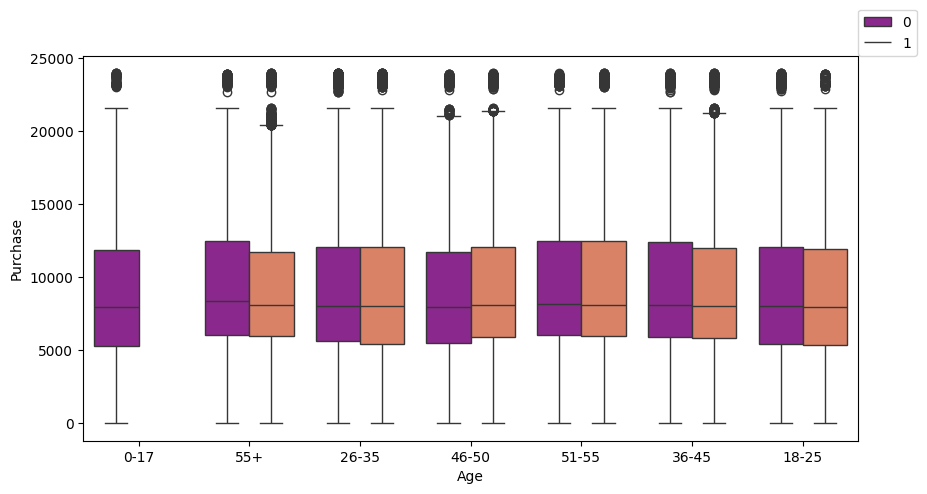

In [ ]:
#Is there a relationship between age, marital status, and the amount spent?
plt.figure(figsize = (10,5))
sns.boxplot(data = data, x = 'Age', y = 'Purchase', hue = 'Marital_Status',palette = 'plasma',legend = True)
plt.legend(['0','1'], loc=(1,1))
plt.show()

<Axes: xlabel='Product_Category', ylabel='count'>

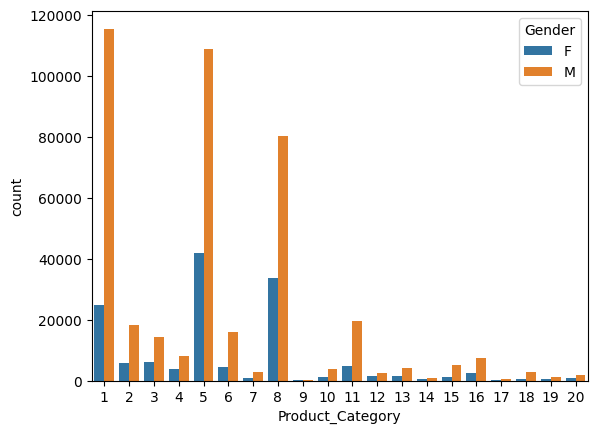

In [ ]:
#Are there preferred product categories for different genders?
sns.countplot(data = data[['Product_Category','Gender']], x = 'Product_Category', hue = 'Gender')

Product categories 1,5,8 have high chances to buy by both Males & Females

In [ ]:
print('Product categories have high chances to buy by males :',end= ' ')
print(*sorted(data[data.Gender.isin(['M'])].value_counts(subset = 'Product_Category').head(5).index),sep = ', ')
print('Product categories have high chances to buy by Females :',end= ' ')
print(*sorted(data[data.Gender.isin(['F'])].value_counts(subset = 'Product_Category').head(5).index),sep = ', ')

Product categories have high chances to buy by males : 1, 2, 5, 8, 11
Product categories have high chances to buy by Females : 1, 2, 3, 5, 8


In [ ]:
#Gender affect on amount spent
df_males = data.loc[data.Gender.isin(['M'])]
print('Male Dataset average of purchases : '+str(df_males.Purchase.mean()))
df_females = data.loc[data.Gender.isin(['F'])]
print('Female Dataset average of purchases : '+str(df_females.Purchase.mean()))

Male Dataset average of purchases : 9437.526040472265
Female Dataset average of purchases : 8734.565765155476


With Total dataset, we can say Males will spends higher than Females

In [ ]:
from os import replace
# function for calciating CTL interval with different sample size

def clt_interval_calculator(n,df,replacer):
  #Z value for 95% confidence interval
  z = norm.ppf(0.025)
  #Population means and standard deviation
  mean = df.Purchase.mean()
  std =  df['Purchase'].std()
  #Lets calcuate 95% confidence interval
  #Sample Size as 300
  sample_means = np.array([df['Purchase'].sample(n,replace= True).mean() for i in range(1000)])
  print('Average of all '+replacer+' samples : '+str(sample_means.mean().round(3)),
      'Average of Population ('+replacer+' Purchase average) : '+str(df.Purchase.mean().round(3)),sep= '\n')

  #Standard Deviation of sampling Distribution is standard Error
  SE = std/np.sqrt(n)
  print('Standard Error of '+replacer+' sampling Distribution : ',np.round(SE,3))

  #lets calcuate 95% confidence interval with 300 sample size
  print('95% confidence that average purchases of '+replacer+' is between ',np.round(mean+(z*SE),3),'and ',np.round(mean-(z*SE)))
  print()
  return sample_means

In [ ]:
print(('with '+str(300)+' samples').center(70,'*'),'',sep = '\n')
male1 = clt_interval_calculator(n = 300,df = df_males,replacer= 'male')
print()
print(('with '+str(300)+' samples').center(70,'*'),'',sep = '\n')
female1 = clt_interval_calculator(n = 300,df = df_females,replacer= 'female')

***************************with 300 samples***************************

Average of all male samples : 9442.156
Average of Population (male Purchase average) : 9437.526
Standard Error of male sampling Distribution :  293.998
95% confidence that average purchases of male is between  8861.302 and  10014.0


***************************with 300 samples***************************

Average of all female samples : 8721.083
Average of Population (female Purchase average) : 8734.566
Standard Error of female sampling Distribution :  275.236
95% confidence that average purchases of female is between  8195.112 and  9274.0



In [ ]:
print(('with '+str(3000)+' samples').center(70,'*'),'',sep = '\n')
male2=clt_interval_calculator(n = 3000,df = df_males,replacer= 'male')
print()
print(('with '+str(3000)+' samples').center(70,'*'),'',sep = '\n')
female2=clt_interval_calculator(n = 3000,df = df_females,replacer= 'female')

**************************with 3000 samples***************************

Average of all male samples : 9438.532
Average of Population (male Purchase average) : 9437.526
Standard Error of male sampling Distribution :  92.97
95% confidence that average purchases of male is between  9255.308 and  9620.0


**************************with 3000 samples***************************

Average of all female samples : 8732.022
Average of Population (female Purchase average) : 8734.566
Standard Error of female sampling Distribution :  87.037
95% confidence that average purchases of female is between  8563.976 and  8905.0



In [ ]:
print(('with '+str(30000)+' samples').center(70,'*'),'',sep = '\n')
male3 = clt_interval_calculator(n = 30000,df = df_males,replacer= 'male')
print()
print(('with '+str(30000)+' samples').center(70,'*'),'',sep = '\n')
female3 = clt_interval_calculator(n = 30000,df = df_females,replacer= 'female')

**************************with 30000 samples**************************

Average of all male samples : 9438.29
Average of Population (male Purchase average) : 9437.526
Standard Error of male sampling Distribution :  29.4
95% confidence that average purchases of male is between  9379.904 and  9495.0


**************************with 30000 samples**************************

Average of all female samples : 8734.941
Average of Population (female Purchase average) : 8734.566
Standard Error of female sampling Distribution :  27.524
95% confidence that average purchases of female is between  8680.62 and  8789.0



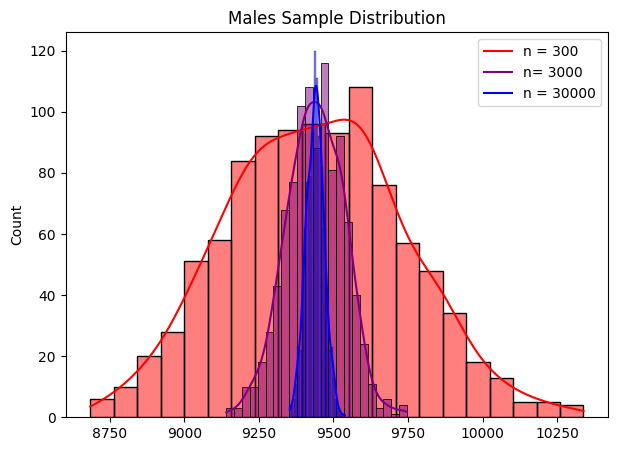

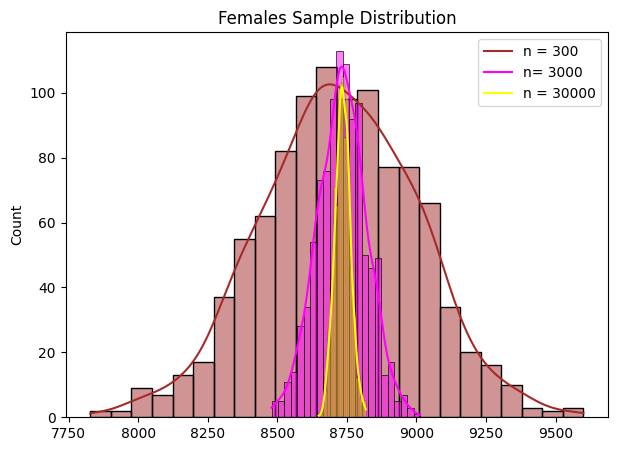

In [ ]:
#ploting the samples distributions
plt.figure(figsize = (7,5))
plt.title('Males Sample Distribution')
sns.histplot(male1,kde = True, color = 'red')
sns.histplot(male2, kde = True, color = 'purple')
sns.histplot(male3,kde = True, color = 'Blue')
plt.legend(['n = 300','n= 3000', 'n = 30000'],loc = 'upper right')
plt.show()

plt.figure(figsize = (7,5))
plt.title('Females Sample Distribution')
sns.histplot(female1,kde = True, color = 'brown')
sns.histplot(female2, kde = True, color = 'Magenta')
sns.histplot(female3,kde = True, color = 'Yellow')
plt.legend(['n = 300','n= 3000', 'n = 30000'],loc = 'upper right')
plt.show()

* With increase of sample size mean of sample distribution is approximately equal to population mean.

* Good sample size provides the best results. (30000 sample size is approx 7% of gender population size.)

* We are 95% confidence that average purchases of male is between  9379.904 and  9495.0

* We are 95% confidence that average purchases of female is between  8680.62 and  8789.0

* width of the confidence interval is inverse proportion to the sample size.

* Shape of Sampling Distribution is proportionate to sample sizes. Good sample size provide better normal distribution

* By observing the confidence Interval of Males and Females we are sure that Gender impacts the purchases





In [ ]:
#Marital_Status affect the amount spent

print(('with '+str(300)+' samples').center(70,'*'),'',sep = '\n')
unmarried1 = clt_interval_calculator(n = 300,df = data.loc[data.Marital_Status == 0],replacer= 'UnMarried')
print()
print(('with '+str(300)+' samples').center(70,'*'),'',sep = '\n')
married1 = clt_interval_calculator(n = 300,df =data.loc[data.Marital_Status == 1],replacer= 'Married')

***************************with 300 samples***************************

Average of all UnMarried samples : 9275.584
Average of Population (UnMarried Purchase average) : 9265.908
Standard Error of UnMarried sampling Distribution :  290.254
95% confidence that average purchases of UnMarried is between  8697.02 and  9835.0


***************************with 300 samples***************************

Average of all Married samples : 9265.584
Average of Population (Married Purchase average) : 9261.175
Standard Error of Married sampling Distribution :  289.651
95% confidence that average purchases of Married is between  8693.47 and  9829.0



In [ ]:
print(('with '+str(3000)+' samples').center(70,'*'),'',sep = '\n')
unmarried2 = clt_interval_calculator(n = 3000,df = data.loc[data.Marital_Status == 0],replacer= 'UnMarried')
print()
print(('with '+str(3000)+' samples').center(70,'*'),'',sep = '\n')
married2 = clt_interval_calculator(n = 3000,df =data.loc[data.Marital_Status == 1],replacer= 'Married')

**************************with 3000 samples***************************

Average of all UnMarried samples : 9265.484
Average of Population (UnMarried Purchase average) : 9265.908
Standard Error of UnMarried sampling Distribution :  91.786
95% confidence that average purchases of UnMarried is between  9086.01 and  9446.0


**************************with 3000 samples***************************

Average of all Married samples : 9262.004
Average of Population (Married Purchase average) : 9261.175
Standard Error of Married sampling Distribution :  91.596
95% confidence that average purchases of Married is between  9081.651 and  9441.0



In [ ]:
print(('with '+str(30000)+' samples').center(70,'*'),'',sep = '\n')
unmarried3 = clt_interval_calculator(n = 30000,df = data.loc[data.Marital_Status == 0],replacer= 'UnMarried')
print()
print(('with '+str(30000)+' samples').center(70,'*'),'',sep = '\n')
married3 = clt_interval_calculator(n = 30000,df =data.loc[data.Marital_Status == 1],replacer= 'Married')

**************************with 30000 samples**************************

Average of all UnMarried samples : 9264.317
Average of Population (UnMarried Purchase average) : 9265.908
Standard Error of UnMarried sampling Distribution :  29.025
95% confidence that average purchases of UnMarried is between  9209.019 and  9323.0


**************************with 30000 samples**************************

Average of all Married samples : 9262.788
Average of Population (Married Purchase average) : 9261.175
Standard Error of Married sampling Distribution :  28.965
95% confidence that average purchases of Married is between  9204.404 and  9318.0



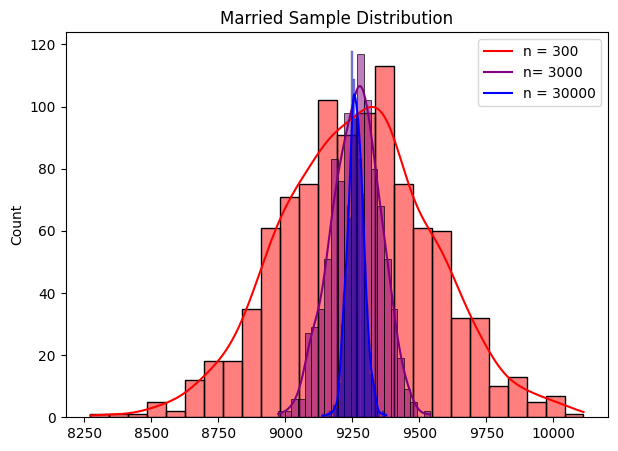

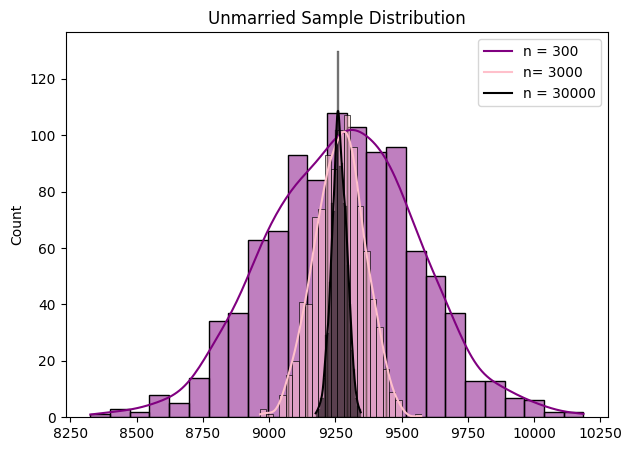

In [ ]:
#ploting the samples distributions
plt.figure(figsize = (7,5))
plt.title('Married Sample Distribution')
sns.histplot(married1,kde = True, color = 'red')
sns.histplot(married2, kde = True, color = 'purple')
sns.histplot(married3,kde = True, color = 'Blue')
plt.legend(['n = 300','n= 3000', 'n = 30000'],loc = 'upper right')
plt.show()
plt.figure(figsize = (7,5))
plt.title('Unmarried Sample Distribution')
sns.histplot(unmarried1,kde = True, color = 'Purple')
sns.histplot(unmarried2, kde = True, color = 'pink')
sns.histplot(unmarried3,kde = True, color = 'black')
plt.legend(['n = 300','n= 3000', 'n = 30000'],loc = 'upper right')
plt.show()


* We are 95% confidence that average purchases of UnMarried is between  9209.019 and  9323.0

* We are 95% confidence that average purchases of Married is between  9204.404 and  9318.0

* width of the confidence interval is inverse proportion to the sample size.

* Shape of Sampling Distribution is proportionate to sample sizes. Good sample size provide better normal distribution

* Married & UnMarried sample distribution are overlapped with each other

In [ ]:
#Age affect the amount spent
#sample size  = 300 and Confidence interval as 95%

print(('with '+str(300)+' samples').center(70,'*'),'',sep = '\n')
young_age1 = clt_interval_calculator(n = 300,df = data.loc[data.Age == '0-17'],replacer= '0-17 aged group')
print()
print(('with '+str(300)+' samples').center(70,'*'),'',sep = '\n')
teenage_age1 = clt_interval_calculator(n = 300,df =data.loc[data.Age == '18-25'],replacer= '18-25 aged group')
print()
print(('with '+str(300)+' samples').center(70,'*'),'',sep = '\n')
mature_adult1 = clt_interval_calculator(n = 300,df =data.loc[data.Age == '26-35'],replacer= '26-35 aged group')
print()
print(('with '+str(300)+' samples').center(70,'*'),'',sep = '\n')
middleaged_adult1 = clt_interval_calculator(n = 300,df =data.loc[data.Age == '36-45'],replacer= '36-45 aged group')
print()
print(('with '+str(300)+' samples').center(70,'*'),'',sep = '\n')
adult1 = clt_interval_calculator(n = 300,df =data.loc[data.Age == '46-50'],replacer= '46-50 aged group')
print()
print(('with '+str(300)+' samples').center(70,'*'),'',sep = '\n')
senior_citizens1 = clt_interval_calculator(n = 300,df =data.loc[data.Age == '51-55'],replacer= '51-55 aged group')
print()
print(('with '+str(300)+' samples').center(70,'*'),'',sep = '\n')
old_age1 = clt_interval_calculator(n = 300,df =data.loc[data.Age == '55+'],replacer= '55+ aged group')



***************************with 300 samples***************************

Average of all 0-17 aged group samples : 8924.369
Average of Population (0-17 aged group Purchase average) : 8933.465
Standard Error of 0-17 aged group sampling Distribution :  295.09
95% confidence that average purchases of 0-17 aged group is between  8355.098 and  9512.0


***************************with 300 samples***************************

Average of all 18-25 aged group samples : 9163.586
Average of Population (18-25 aged group Purchase average) : 9169.664
Standard Error of 18-25 aged group sampling Distribution :  290.657
95% confidence that average purchases of 18-25 aged group is between  8599.987 and  9739.0


***************************with 300 samples***************************

Average of all 26-35 aged group samples : 9262.938
Average of Population (26-35 aged group Purchase average) : 9252.691
Standard Error of 26-35 aged group sampling Distribution :  289.283
95% confidence that average purchases o

In [ ]:
#Age affect the amount spent
#sample size  = 3000 and Confidence interval as 95%

print(('with '+str(3000)+' samples').center(70,'*'),'',sep = '\n')
young_age2 = clt_interval_calculator(n = 3000,df = data.loc[data.Age == '0-17'],replacer= '0-17 aged group')
print()
print(('with '+str(3000)+' samples').center(70,'*'),'',sep = '\n')
teenage_age2 = clt_interval_calculator(n = 3000,df =data.loc[data.Age == '18-25'],replacer= '18-25 aged group')
print()
print(('with '+str(3000)+' samples').center(70,'*'),'',sep = '\n')
mature_adult2 = clt_interval_calculator(n = 3000,df =data.loc[data.Age == '26-35'],replacer= '26-35 aged group')
print()
print(('with '+str(3000)+' samples').center(70,'*'),'',sep = '\n')
middleaged_adult2 = clt_interval_calculator(n = 3000,df =data.loc[data.Age == '36-45'],replacer= '36-45 aged group')
print()
print(('with '+str(3000)+' samples').center(70,'*'),'',sep = '\n')
adult2 = clt_interval_calculator(n = 3000,df =data.loc[data.Age == '46-50'],replacer= '46-50 aged group')
print()
print(('with '+str(3000)+' samples').center(70,'*'),'',sep = '\n')
senior_citizens2 = clt_interval_calculator(n = 3000,df =data.loc[data.Age == '51-55'],replacer= '51-55 aged group')
print()
print(('with '+str(3000)+' samples').center(70,'*'),'',sep = '\n')
old_age2 = clt_interval_calculator(n = 3000,df =data.loc[data.Age == '55+'],replacer= '55+ aged group')



**************************with 3000 samples***************************

Average of all 0-17 aged group samples : 8931.613
Average of Population (0-17 aged group Purchase average) : 8933.465
Standard Error of 0-17 aged group sampling Distribution :  93.316
95% confidence that average purchases of 0-17 aged group is between  8750.569 and  9116.0


**************************with 3000 samples***************************

Average of all 18-25 aged group samples : 9170.204
Average of Population (18-25 aged group Purchase average) : 9169.664
Standard Error of 18-25 aged group sampling Distribution :  91.914
95% confidence that average purchases of 18-25 aged group is between  8989.516 and  9350.0


**************************with 3000 samples***************************

Average of all 26-35 aged group samples : 9250.118
Average of Population (26-35 aged group Purchase average) : 9252.691
Standard Error of 26-35 aged group sampling Distribution :  91.479
95% confidence that average purchases of 

In [ ]:
#Age affect the amount spent
#sample size  = 30000 and Confidence interval as 95%

print(('with '+str(30000)+' samples').center(70,'*'),'',sep = '\n')
young_age3 = clt_interval_calculator(n = 30000,df = data.loc[data.Age == '0-17'],replacer= '0-17 aged group')
print()
print(('with '+str(30000)+' samples').center(70,'*'),'',sep = '\n')
teenage_age3 = clt_interval_calculator(n = 30000,df =data.loc[data.Age == '18-25'],replacer= '18-25 aged group')
print()
print(('with '+str(30000)+' samples').center(70,'*'),'',sep = '\n')
mature_adult3 = clt_interval_calculator(n = 30000,df =data.loc[data.Age == '26-35'],replacer= '26-35 aged group')
print()
print(('with '+str(30000)+' samples').center(70,'*'),'',sep = '\n')
middleaged_adult3 = clt_interval_calculator(n = 30000,df =data.loc[data.Age == '36-45'],replacer= '36-45 aged group')
print()
print(('with '+str(30000)+' samples').center(70,'*'),'',sep = '\n')
adult3 = clt_interval_calculator(n = 30000,df =data.loc[data.Age == '46-50'],replacer= '46-50 aged group')
print()
print(('with '+str(30000)+' samples').center(70,'*'),'',sep = '\n')
senior_citizens3 = clt_interval_calculator(n = 30000,df =data.loc[data.Age == '51-55'],replacer= '51-55 aged group')
print()
print(('with '+str(30000)+' samples').center(70,'*'),'',sep = '\n')
old_age3 = clt_interval_calculator(n = 30000,df =data.loc[data.Age == '55+'],replacer= '55+ aged group')



**************************with 30000 samples**************************

Average of all 0-17 aged group samples : 8931.919
Average of Population (0-17 aged group Purchase average) : 8933.465
Standard Error of 0-17 aged group sampling Distribution :  29.509
95% confidence that average purchases of 0-17 aged group is between  8875.628 and  8991.0


**************************with 30000 samples**************************

Average of all 18-25 aged group samples : 9170.828
Average of Population (18-25 aged group Purchase average) : 9169.664
Standard Error of 18-25 aged group sampling Distribution :  29.066
95% confidence that average purchases of 18-25 aged group is between  9112.696 and  9227.0


**************************with 30000 samples**************************

Average of all 26-35 aged group samples : 9252.528
Average of Population (26-35 aged group Purchase average) : 9252.691
Standard Error of 26-35 aged group sampling Distribution :  28.928
95% confidence that average purchases of 

In [ ]:
#filtering out the warnings
import warnings
warnings.filterwarnings("ignore")

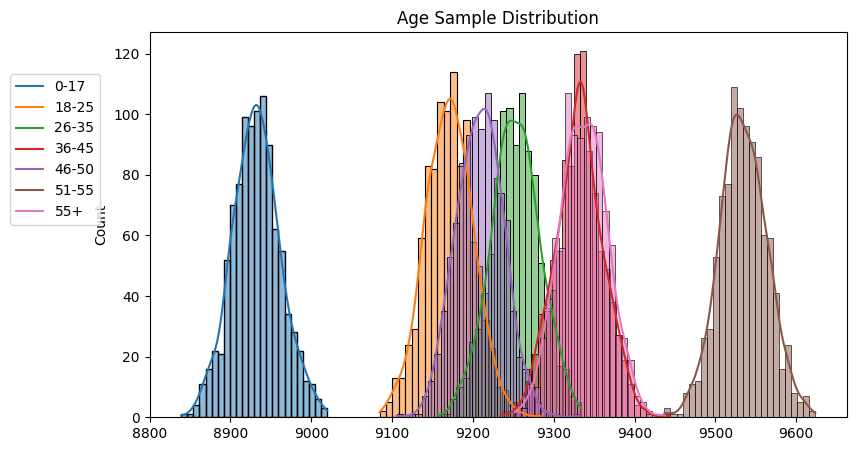

In [ ]:
#ploting the smaples distributions
plt.figure(figsize = (9,5))
plt.title('Age Sample Distribution')
sns.histplot(young_age3,kde = True, palette = 'plasma')
sns.histplot(teenage_age3, kde = True, palette = 'plasma')
sns.histplot(mature_adult3,kde = True, palette = 'plasma')
sns.histplot(middleaged_adult3,kde = True, palette = 'plasma')
sns.histplot(adult3,kde = True, palette = 'plasma')
sns.histplot(senior_citizens3,kde = True, palette = 'plasma')
sns.histplot(old_age3,kde = True, palette = 'plasma')
plt.legend(['0-17', '18-25','26-35','36-45', '46-50', '51-55', '55+'],loc = (-0.2,0.5))
plt.show()


* Age categories 18-25, 46-50, 26-35 are overlapeed with each other.
* Age categories 36-45, 55+ are strongly  over lapped with each other.
* Age categories 0-17 & 51-55 are not overlapped with any of the other categories.


* 95% confidence that average purchases of 0-17 aged group is between  8875.628 and  8991.0
* 95% confidence that average purchases of 18-25 aged group is between  9112.696 and  9227.0
* 95% confidence that average purchases of 26-35 aged group is between  9195.992 and  9309.0
* 95% confidence that average purchases of 36-45 aged group is between  9274.512 and  9388.0
* 95% confidence that average purchases of 46-50 aged group is between  9152.417 and  9265.0
* 95% confidence that average purchases of 51-55 aged group is between  9477.24 and  9592.0
* 95% confidence that average purchases of 55+ aged group is between  9279.571 and  9393.0

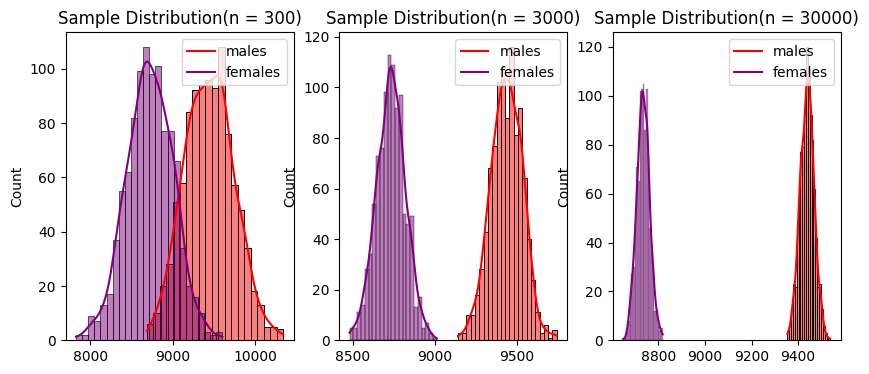

In [ ]:
#Create Report

#ploting the samples distributions
plt.figure(figsize = (10,4))
plt.subplot(1,3,1)
plt.title('Sample Distribution(n = 300)')
sns.histplot(male1,kde = True, color = 'red')
sns.histplot(female1, kde = True, color = 'purple')
plt.legend(['males','females'],loc = 'upper right')

plt.subplot(1,3,2)
plt.title('Sample Distribution(n = 3000)')
sns.histplot(male2,kde = True, color = 'red')
sns.histplot(female2, kde = True, color = 'purple')
plt.legend(['males','females'],loc = 'upper right')

plt.subplot(1,3,3)
plt.title('Sample Distribution(n = 30000)')
sns.histplot(male3,kde = True, color = 'red')
sns.histplot(female3, kde = True, color = 'purple')
plt.legend(['males','females'],loc = 'upper right')
plt.show()

* Males and Females are not overlapped with each other for higer sample size.
* It indicates the lower sample size will have higher Standard Error comparing to higher sample size.

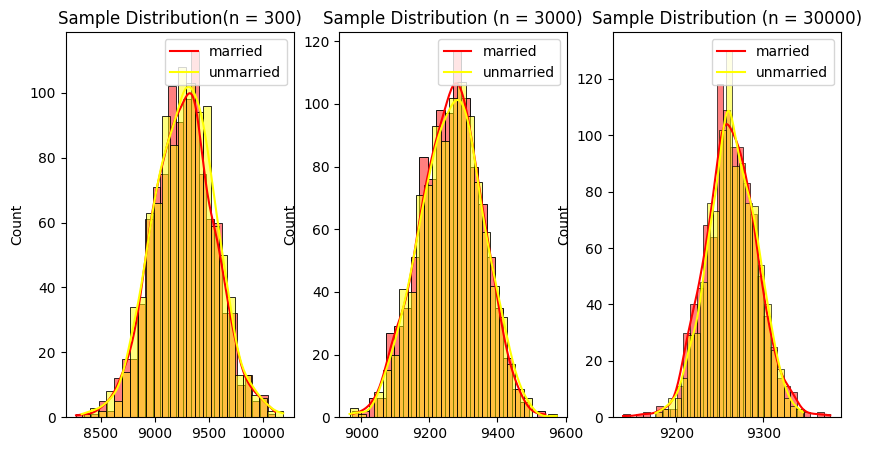

In [ ]:
#ploting the samples distributions
plt.figure(figsize = (10,5))
plt.subplot(1,3,1)
plt.title('Sample Distribution(n = 300)')
sns.histplot(married1,kde = True, color = 'red')
sns.histplot(unmarried1, kde = True, color = 'yellow')
plt.legend(['married','unmarried'],loc = 'upper right')

plt.subplot(1,3,2)
plt.title('Sample Distribution (n = 3000)')
sns.histplot(married2,kde = True, color = 'red')
sns.histplot(unmarried2, kde = True, color = 'yellow')
plt.legend(['married','unmarried'],loc = 'upper right')

plt.subplot(1,3,3)
plt.title('Sample Distribution (n = 30000)')
sns.histplot(married3,kde = True, color = 'red')
sns.histplot(unmarried3, kde = True, color = 'yellow')
plt.legend(['married','unmarried'],loc = 'upper right')

plt.show()

* Married and UnMarried sample distribution is overlapped with each other for higer sample size(even at lower smaple size of 300).
* It states that Marital Status is almost desent impact of average sales.

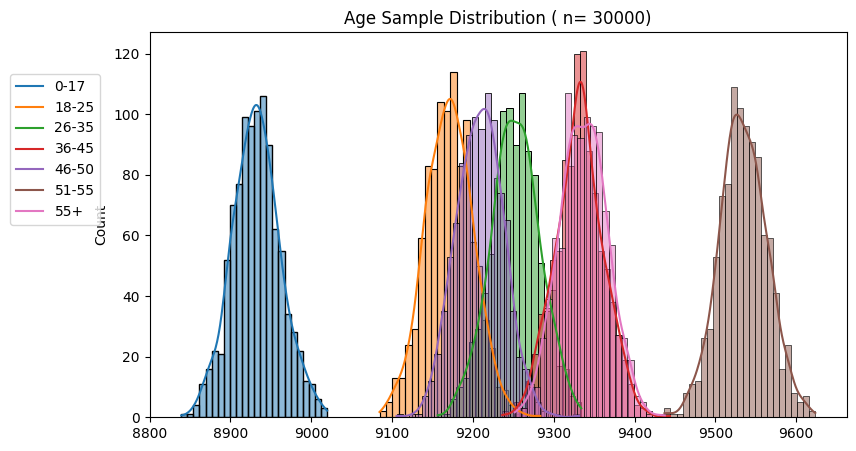

In [ ]:
plt.figure(figsize = (9,5))
plt.title('Age Sample Distribution ( n= 30000)')
sns.histplot(young_age3,kde = True,)
sns.histplot(teenage_age3, kde = True)
sns.histplot(mature_adult3,kde = True)
sns.histplot(middleaged_adult3,kde = True)
sns.histplot(adult3,kde = True)
sns.histplot(senior_citizens3,kde = True)
sns.histplot(old_age3,kde = True)
plt.legend(['0-17', '18-25','26-35','36-45', '46-50', '51-55', '55+'],loc = (-0.2,0.5))
plt.show()

* Age categories 18-25, 46-50, 26-35 are overlapeed with each other.
* Age categories 36-45, 55+ are strongly  over lapped with each other.
* Age categories 0-17 & 51-55 are not overlapped with any of the other categories.
* Age will impact the product purchases

#Insights:

* Purchases has more outliers. there are some products with hight purchase amounts. Expecially females have more outlier purchases comeparing to males.

* Females has greater outliers still average Males spents are slightly higher than Females spents.

* Among all Products P00265242,P00110742, P00025442,P00112142 are most purchased items

* Product_category 5 with age groups [26-35,36-45,18-25], 8 [26-35],1 [26-35] are highest among others. It covers almost 50% sales.

* Males have high chance to buy the product categories like 1, 2, 5, 8, 11. and Females have high chance to buy the product categories like 1, 2, 3, 5, 8

Confidence Interval by Gender:
* 95% confidence that average purchases of male is between 9379.904 and 9495.0

* 95% confidence that average purchases of female is between 8680.62 and 8789.0

Confidence interval by Marital Status:

* 95% confidence that average purchases of UnMarried is between 9209.019 and 9323.0

* 95% confidence that average purchases of Married is between 9204.404 and 9318.0

Confidence Interval by Aged :

* 95% confidence that average purchases of 0-17 aged group is between 8875.628 and 8991.0
* 95% confidence that average purchases of 18-25 aged group is between 9112.696 and 9227.0
* 95% confidence that average purchases of 26-35 aged group is between 9195.992 and 9309.0
* 95% confidence that average purchases of 36-45 aged group is between 9274.512 and 9388.0
* 95% confidence that average purchases of 46-50 aged group is between 9152.417 and 9265.0
* 95% confidence that average purchases of 51-55 aged group is between 9477.24 and 9592.0
* 95% confidence that average purchases of 55+ aged group is between 9279.571 and 9393.0




##Recommendations:

* 1, 5 & 8 are fast selling products categories.So company can focus more on these Product Categories type and can recommed to users.
* Unmarried customers spend more money than married customers, So company should focus on acquisition of Unmarried customers.
* Males have high chances spends on products comparing to females. they can suggest variety of products to mens.
* 50 - 55, 55+ aged group has more average purchases. Company can expect and focus more on aged groups than younger for sales.

